In [1]:
import pandas as pd

In [2]:
applicant_df = pd.read_csv('applicant.csv')
loan_df = pd.read_csv('loan.csv')

In [3]:
print(applicant_df.head())
print(applicant_df.info())
print(applicant_df.describe())

   applicant_id  Primary_applicant_age_in_years  Gender  \
0       1469590                              67    male   
1       1203873                              22  female   
2       1432761                              49    male   
3       1207582                              45    male   
4       1674436                              53    male   

               Marital_status  Number_of_dependents   Housing  \
0                      single                     1       own   
1  divorced/separated/married                     1       own   
2                      single                     2       own   
3                      single                     2  for free   
4                      single                     2  for free   

   Years_at_current_residence            Employment_status  \
0                           4  skilled employee / official   
1                           2  skilled employee / official   
2                           3         unskilled - resident   
3     

In [4]:
print(loan_df.head())
print(loan_df.info())
print(loan_df.describe())

                    loan_application_id  applicant_id  Months_loan_taken_for  \
0  d68d975e-edad-11ea-8761-1d6f9c1ff461       1469590                      6   
1  d68d989e-edad-11ea-b1d5-2bcf65006448       1203873                     48   
2  d68d995c-edad-11ea-814a-1b6716782575       1432761                     12   
3  d68d99fc-edad-11ea-8841-17e8848060ae       1207582                     42   
4  d68d9a92-edad-11ea-9f3d-1f8682db006a       1674436                     24   

                Purpose  Principal_loan_amount  \
0  electronic equipment                1169000   
1  electronic equipment                5951000   
2             education                2096000   
3                  FF&E                7882000   
4           new vehicle                4870000   

   EMI_rate_in_percentage_of_disposable_income  \
0                                            4   
1                                            2   
2                                            2   
3                 

In [5]:
data = pd.merge(loan_df, applicant_df, on='applicant_id')

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

In [7]:
print(data.isnull().sum())

loan_application_id                                           0
applicant_id                                                  0
Months_loan_taken_for                                         0
Purpose                                                      12
Principal_loan_amount                                         0
EMI_rate_in_percentage_of_disposable_income                   0
Property                                                    154
Has_coapplicant                                               0
Has_guarantor                                                 0
Other_EMI_plans                                             814
Number_of_existing_loans_at_this_bank                         0
Loan_history                                                  0
high_risk_applicant                                           0
Primary_applicant_age_in_years                                0
Gender                                                        0
Marital_status                          

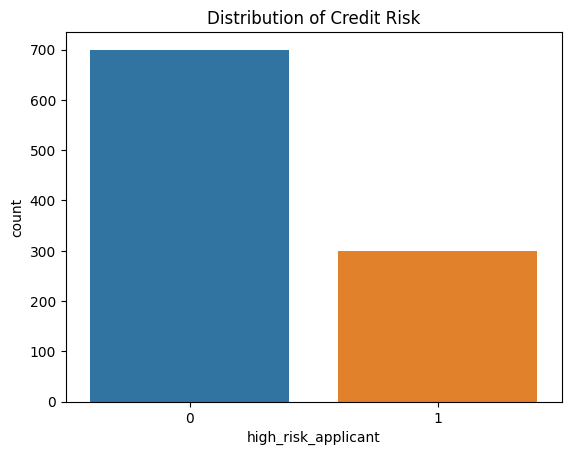

In [20]:
sns.countplot(data=data, x='high_risk_applicant')
plt.title('Distribution of Credit Risk')
plt.show()

C:\Users\Abhishek\AppData\Local\Temp\ipykernel_17800\3718659487.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data.corr()


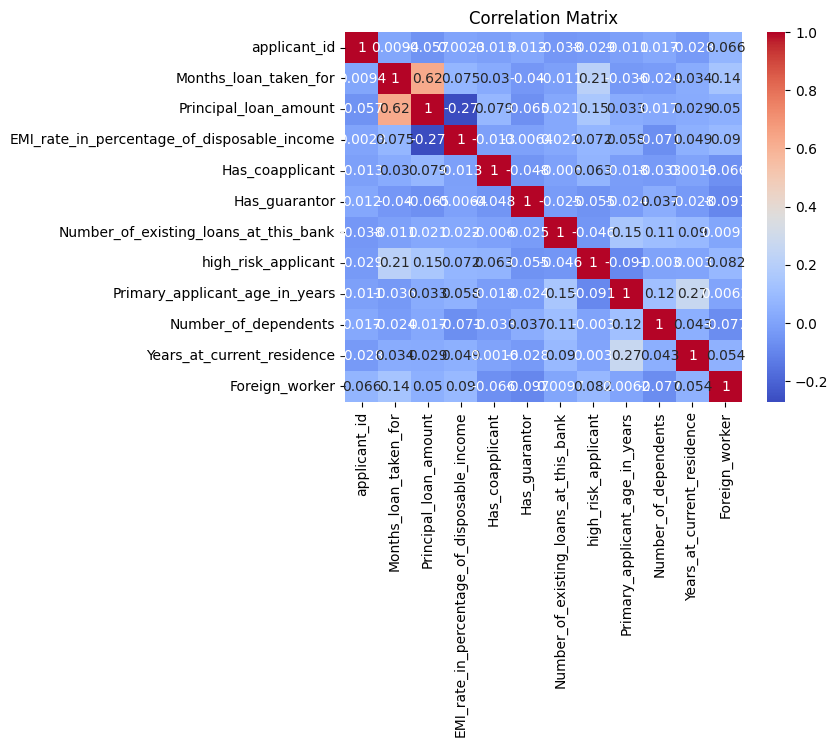

In [9]:
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

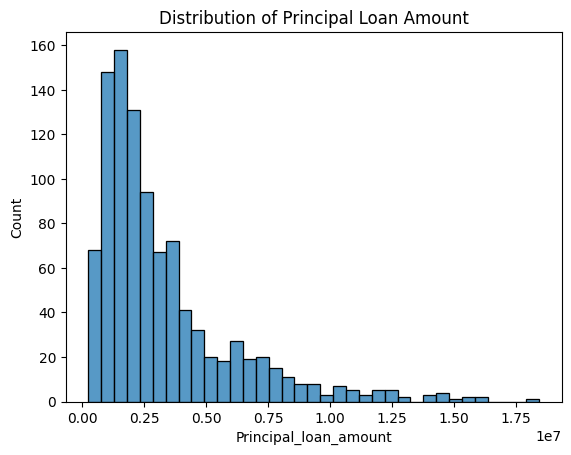

In [10]:
sns.histplot(data['Principal_loan_amount'])
plt.title('Distribution of Principal Loan Amount')
plt.show()



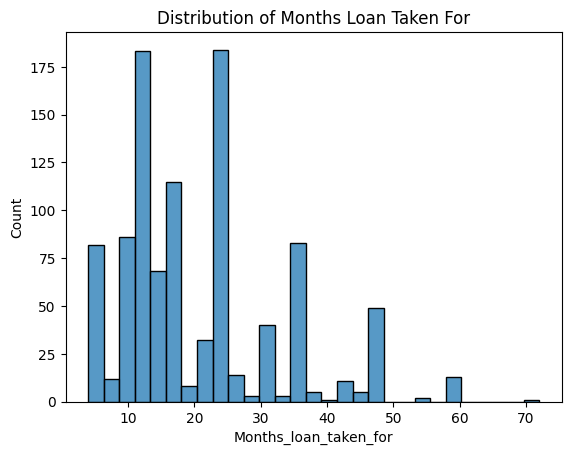

In [11]:
sns.histplot(data['Months_loan_taken_for'])
plt.title('Distribution of Months Loan Taken For')
plt.show()

In [13]:
data['Gender'] = data['Gender'].map({'male': 0, 'female': 1})
data['Marital_status'] = data['Marital_status'].map({'single': 0, 'married': 1})
data['Housing'] = data['Housing'].map({'own': 0, 'rent': 1})
data['Employment_status'] = data['Employment_status'].map({'employed': 1, 'unemployed': 0})
data['Foreign_worker'] = data['Foreign_worker'].astype(int)

In [14]:
data = pd.get_dummies(data, columns=['Purpose', 'Property', 'Loan_history', 'Has_been_employed_for_at_least', 'Has_been_employed_for_at_most'])

In [15]:
data.fillna(data.median(), inplace=True)

C:\Users\Abhishek\AppData\Local\Temp\ipykernel_17800\421635383.py:1: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.fillna(data.median(), inplace=True)


In [16]:
print(data.head())
print(data.info())

                    loan_application_id  applicant_id  Months_loan_taken_for  \
0  d68d975e-edad-11ea-8761-1d6f9c1ff461       1469590                      6   
1  d68d989e-edad-11ea-b1d5-2bcf65006448       1203873                     48   
2  d68d995c-edad-11ea-814a-1b6716782575       1432761                     12   
3  d68d99fc-edad-11ea-8841-17e8848060ae       1207582                     42   
4  d68d9a92-edad-11ea-9f3d-1f8682db006a       1674436                     24   

   Principal_loan_amount  EMI_rate_in_percentage_of_disposable_income  \
0                1169000                                            4   
1                5951000                                            2   
2                2096000                                            2   
3                7882000                                            2   
4                4870000                                            3   

   Has_coapplicant  Has_guarantor Other_EMI_plans  \
0                0         

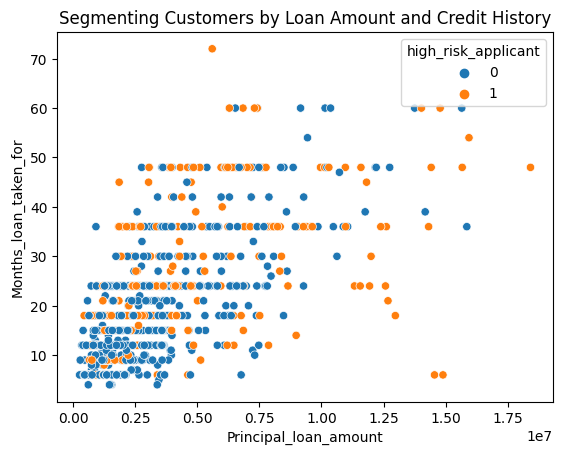

In [26]:
sns.scatterplot(data=data, x='Principal_loan_amount', y='Months_loan_taken_for', hue='high_risk_applicant')
plt.title('Segmenting Customers by Loan Amount and Credit History')
plt.show()

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [28]:
X = data.drop(['applicant_id', 'high_risk_applicant'], axis=1)
y = data['high_risk_applicant']

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [31]:
print(X_train.head())
print(X_train.dtypes)

                      loan_application_id  Months_loan_taken_for  \
541  d68ec610-edad-11ea-a9e3-34c102a3ca0b                     24   
440  d68e8f60-edad-11ea-b47b-374afaf145c9                     12   
482  d68ea5e0-edad-11ea-90d2-189b6aebb819                     30   
422  d68e85ba-edad-11ea-95d8-57a2d978c68f                     12   
778  d68f4b12-edad-11ea-9503-1b1b168da61f                     36   

     Principal_loan_amount  EMI_rate_in_percentage_of_disposable_income  \
541                2032000                                            4   
440                1884000                                            4   
482                3622000                                            4   
422                 958000                                            2   
778                5711000                                            4   

     Has_coapplicant  Has_guarantor Other_EMI_plans  \
541                0              0             NaN   
440                0          

In [32]:
numeric_features = X_train.select_dtypes(include=['number']).columns
categorical_features = X_train.select_dtypes(exclude=['number']).columns

In [42]:
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

In [43]:
print("Shape of X_train_processed:", X_train_processed.shape)
print("Shape of X_test_processed:", X_test_processed.shape)

Shape of X_train_processed: (700, 754)
Shape of X_test_processed: (300, 754)


In [44]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report

In [45]:
logistic_model = LogisticRegression()
random_forest_model = RandomForestClassifier()

In [46]:
logistic_model.fit(X_train_processed, y_train)
random_forest_model.fit(X_train_processed, y_train)

RandomForestClassifier()

In [47]:
y_pred_logistic = logistic_model.predict(X_test_processed)
print("Logistic Regression Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_logistic))
print("Logistic Regression Classification Report:")
print(classification_report(y_test, y_pred_logistic))

Logistic Regression Confusion Matrix:
[[209   0]
 [ 91   0]]
Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.70      1.00      0.82       209
           1       0.00      0.00      0.00        91

    accuracy                           0.70       300
   macro avg       0.35      0.50      0.41       300
weighted avg       0.49      0.70      0.57       300



C:\Users\Abhishek\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Abhishek\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Abhishek\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf

In [48]:
y_pred_rf = random_forest_model.predict(X_test_processed)
print("Random Forest Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf))
print("Random Forest Classification Report:")
print(classification_report(y_test, y_pred_rf))

Random Forest Confusion Matrix:
[[200   9]
 [ 73  18]]
Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.96      0.83       209
           1       0.67      0.20      0.31        91

    accuracy                           0.73       300
   macro avg       0.70      0.58      0.57       300
weighted avg       0.71      0.73      0.67       300



In [49]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20],
    'min_samples_split': [2, 5]
}

grid_search = GridSearchCV(estimator=random_forest_model, param_grid=param_grid, cv=5, scoring='accuracy')

grid_search.fit(X_train_processed, y_train)

print("Best Parameters for Random Forest:", grid_search.best_params_)

Best Parameters for Random Forest: {'max_depth': 20, 'min_samples_split': 2, 'n_estimators': 200}


In [50]:
import joblib

# Export the models
joblib.dump(logistic_model, 'logistic_model.pkl')
joblib.dump(random_forest_model, 'random_forest_model.pkl')

['random_forest_model.pkl']